<a href="https://colab.research.google.com/github/AritraN18/DEMO/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
filepath = '/content/drive/MyDrive/1788410-1767134-1729261-1613779-Red_wine__(1).csv'
raw_df = pd.read_csv(filepath)

In [ ]:
raw_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [ ]:
raw_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
raw_df.shape

(1599, 12)

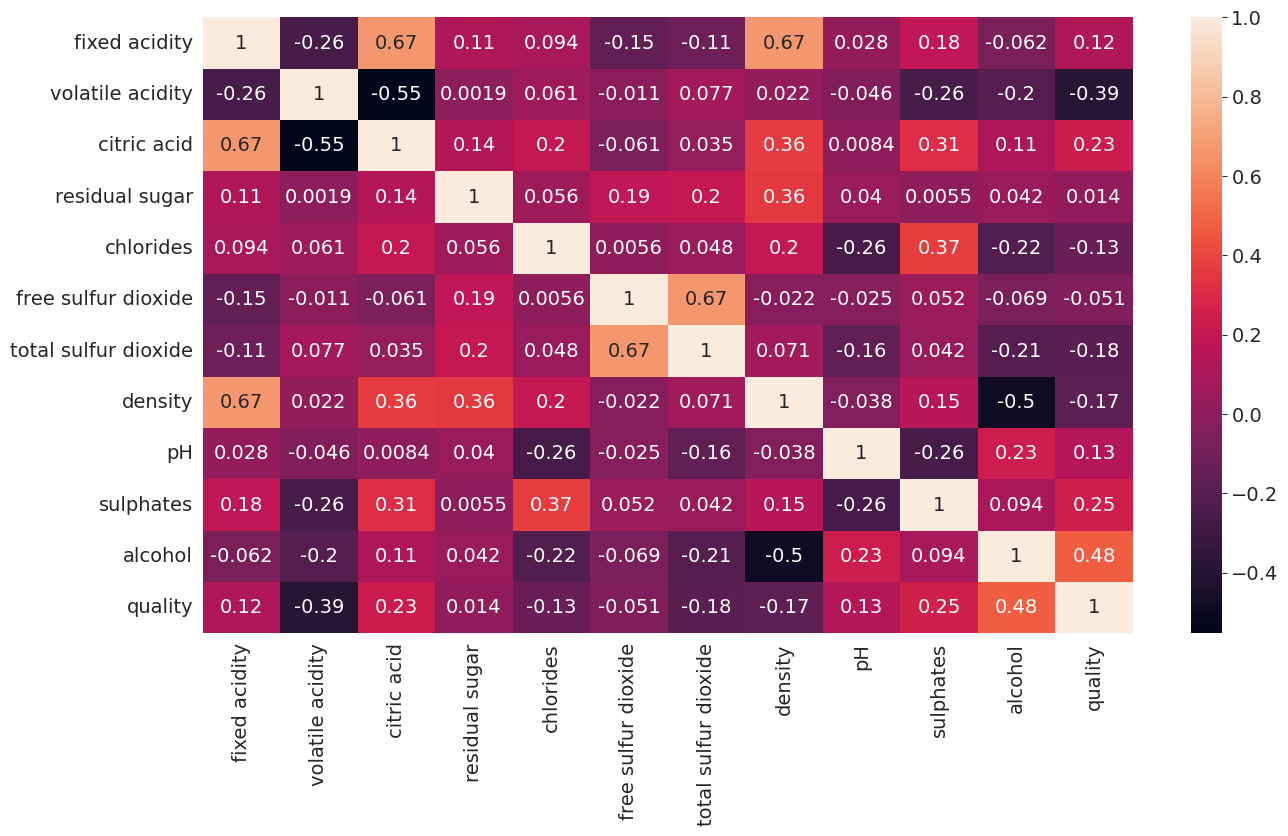

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(raw_df.corr(),annot = True);

# Exploratory Data **Analysis**

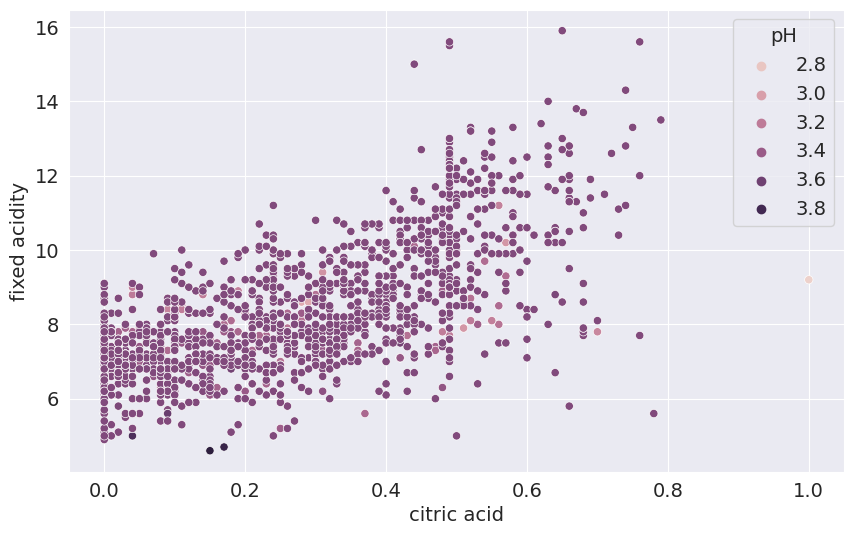

In [ ]:
sns.scatterplot(data=raw_df, y='fixed acidity', x= 'citric acid', hue= 'pH');

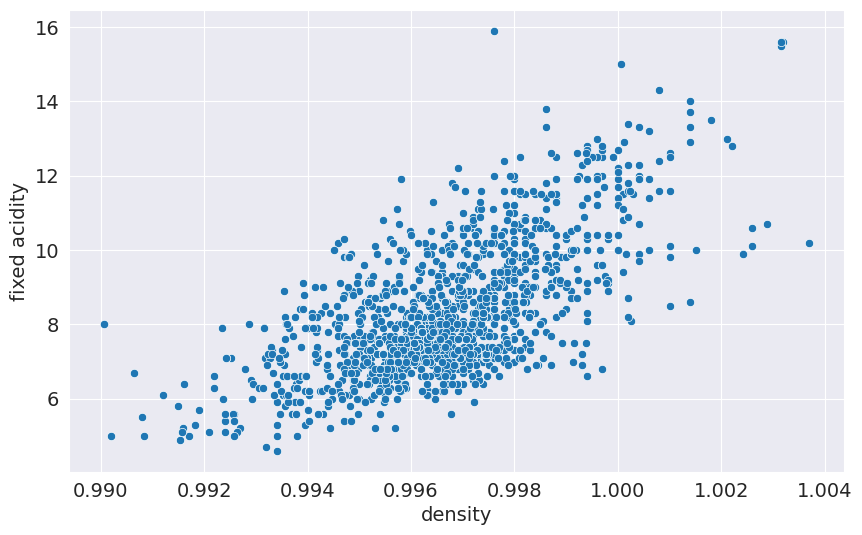

In [ ]:
sns.scatterplot(data=raw_df, y='fixed acidity', x= 'density');

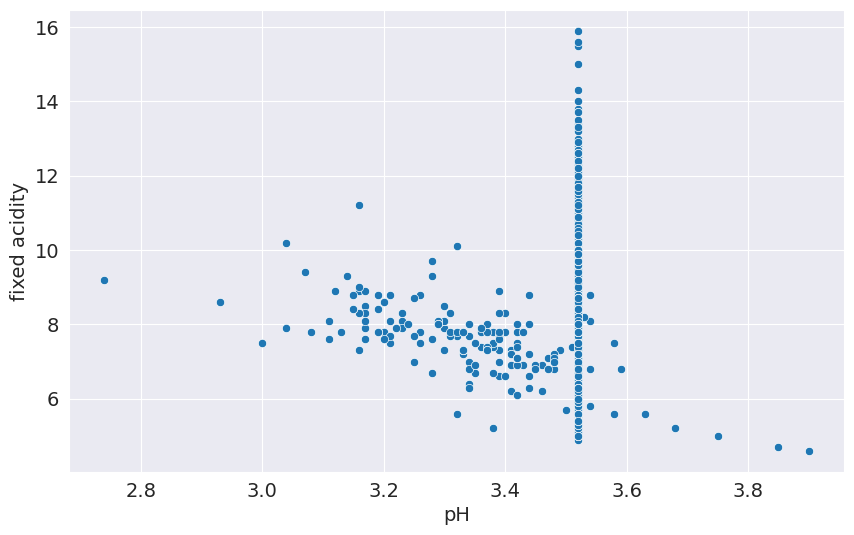

In [ ]:
sns.scatterplot(data=raw_df, y='fixed acidity', x= 'pH');

7.9 is median value.


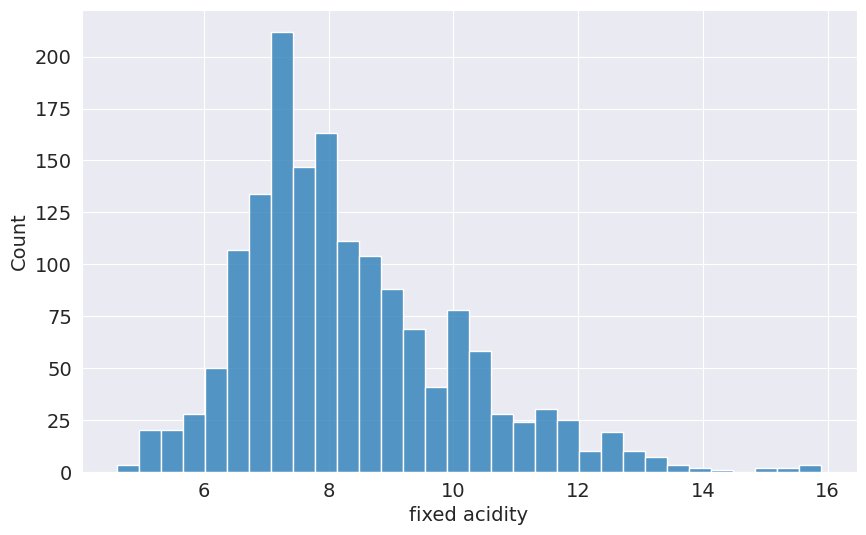

In [ ]:
median_value = np.median(raw_df['fixed acidity'])
print(f'{median_value} is median value.')
sns.histplot(data=raw_df, x= 'fixed acidity');

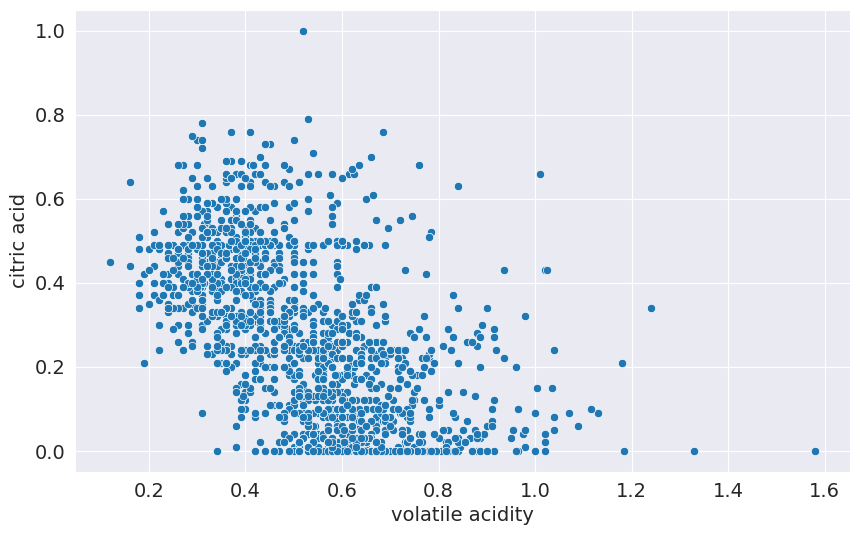

In [ ]:
sns.scatterplot(data=raw_df,y='citric acid',x='volatile acidity');

0.52 is median value.


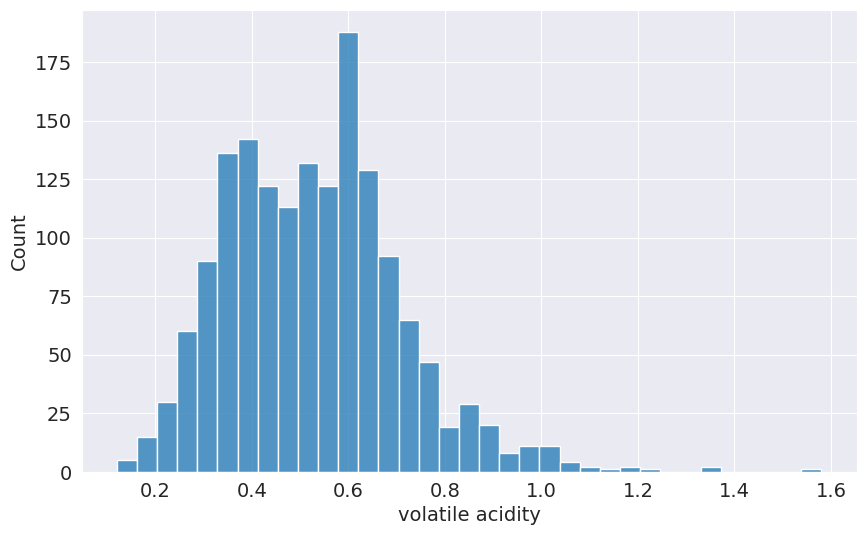

In [ ]:
median_value = np.median(raw_df['volatile acidity'])
print(f'{median_value} is median value.')
sns.histplot(data=raw_df, x= 'volatile acidity');

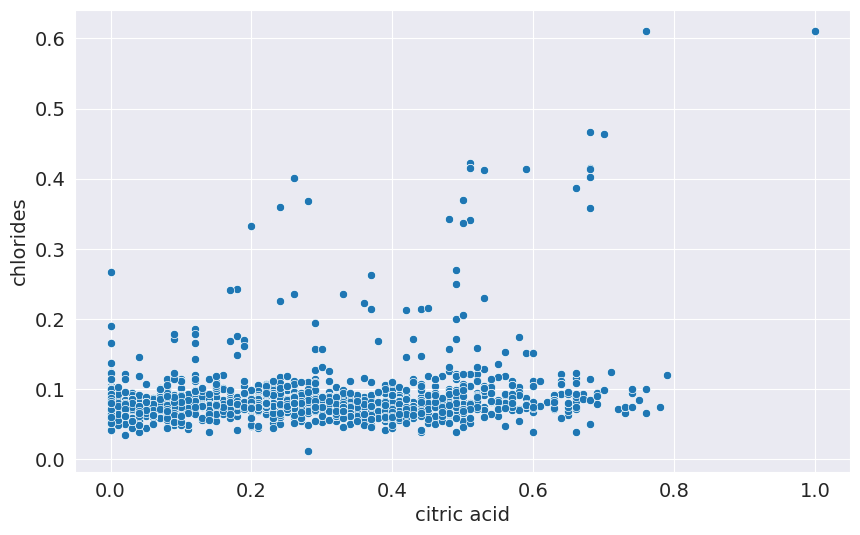

In [ ]:
sns.scatterplot(data=raw_df,x='citric acid',y='chlorides');

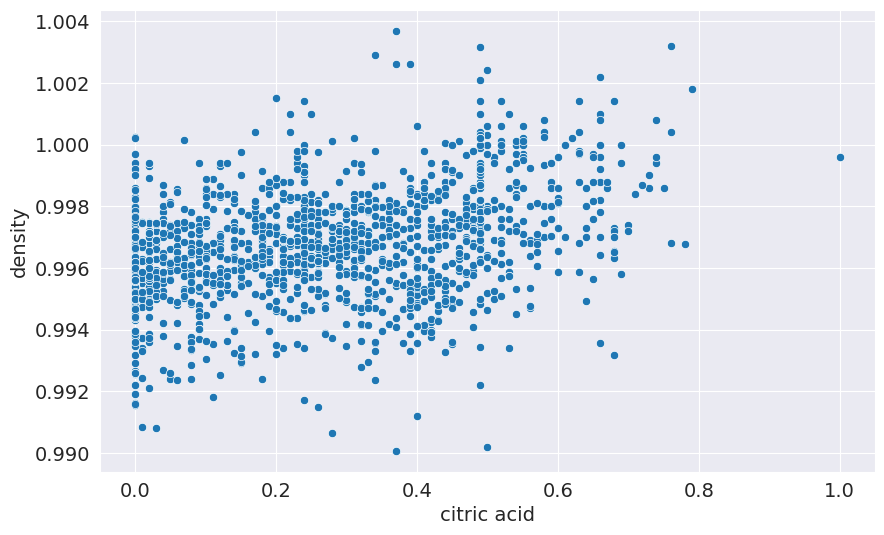

In [ ]:
# citric acid vs density
sns.scatterplot(data=raw_df,x='citric acid',y='density');

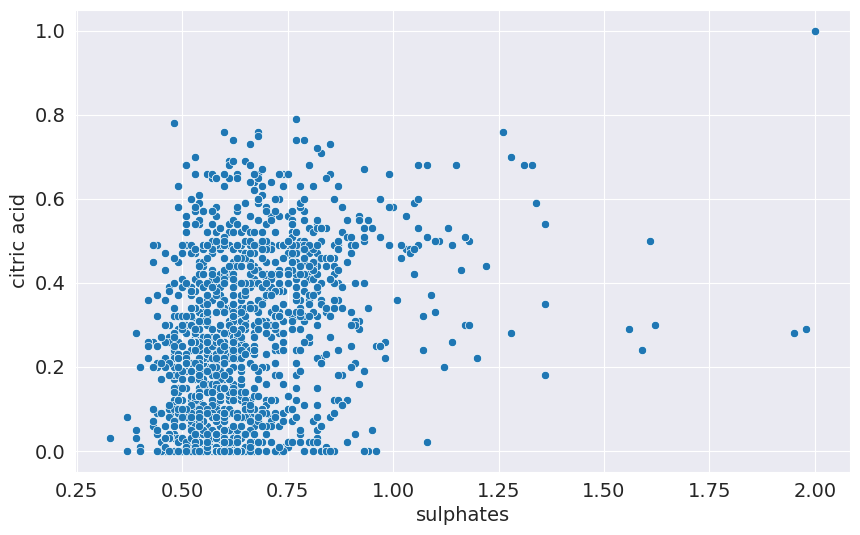

In [ ]:
sns.scatterplot(data=raw_df,y='citric acid',x='sulphates');

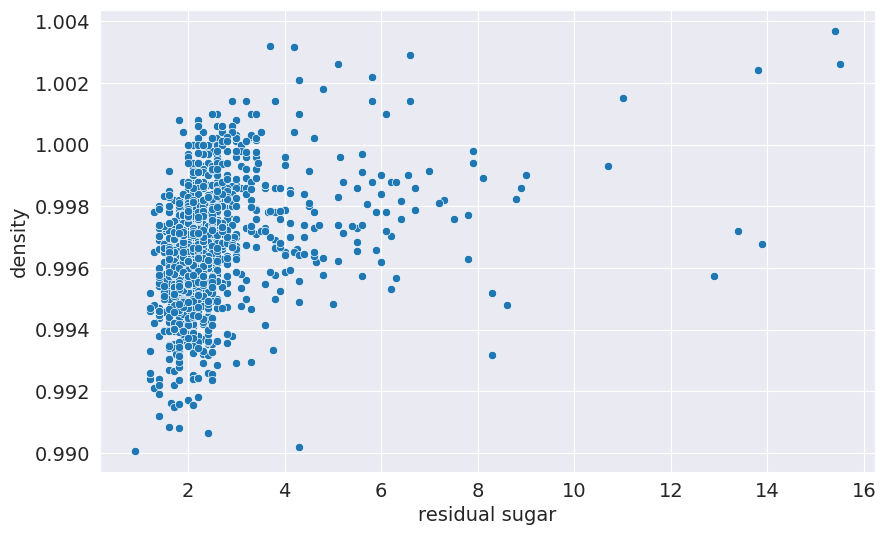

In [ ]:
sns.scatterplot(data=raw_df,x='residual sugar',y='density');

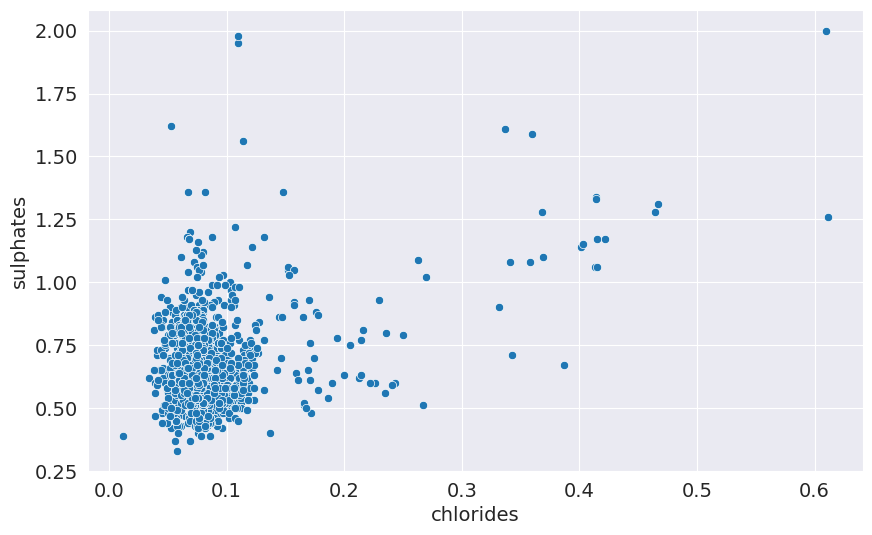

In [ ]:
sns.scatterplot(data=raw_df,x='chlorides',y='sulphates');

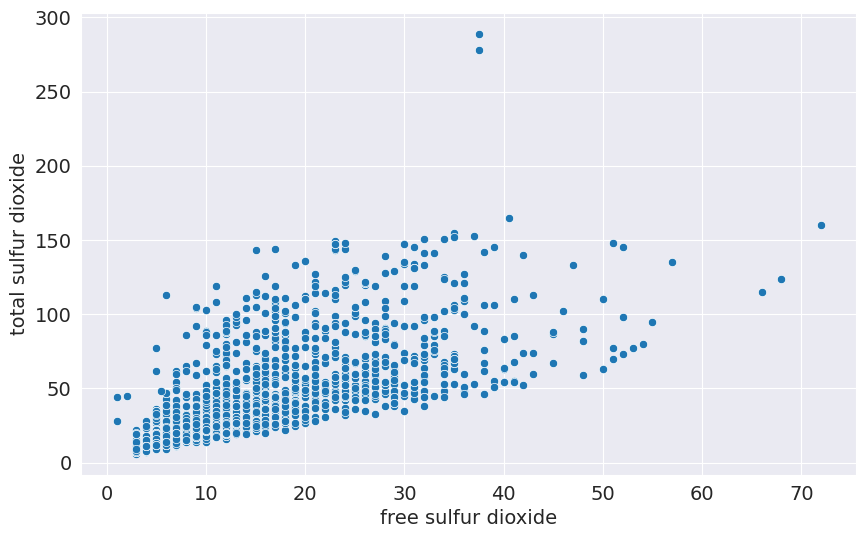

In [ ]:
sns.scatterplot(data=raw_df, x='free sulfur dioxide', y='total sulfur dioxide');

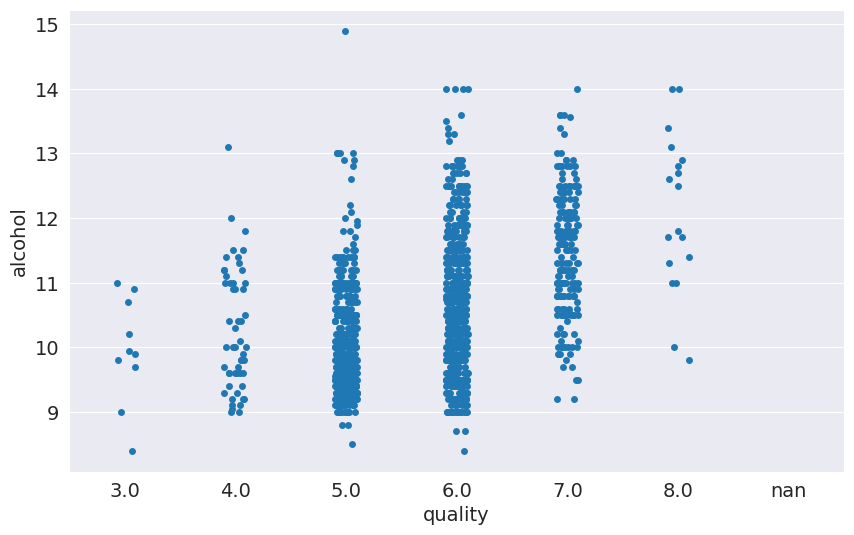

In [ ]:
sns.stripplot(raw_df,y='alcohol',x='quality');

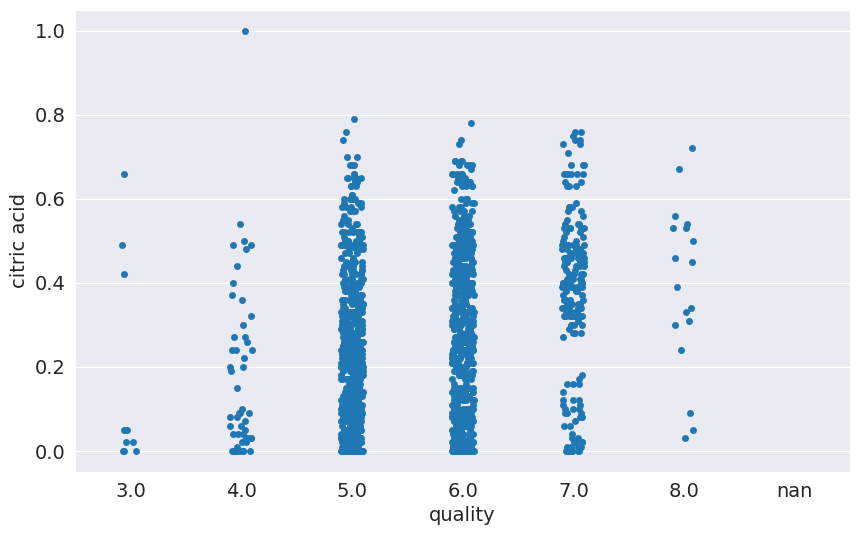

In [ ]:
sns.stripplot(raw_df,y='citric acid',x='quality');

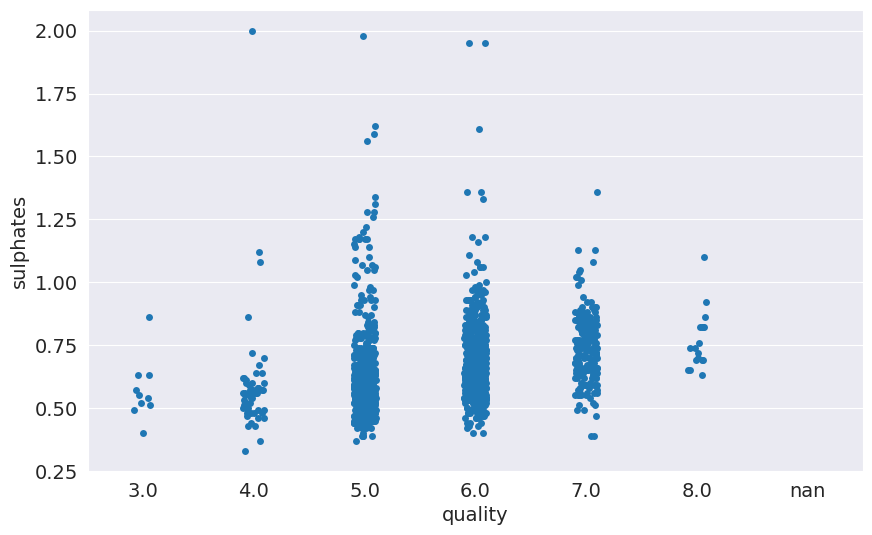

In [ ]:
sns.stripplot(raw_df,y='sulphates',x='quality');

In [ ]:
def create_histplot(df):
    for column in df.columns:
        median_value = np.median(df[column])
        print(f'{median_value} is median value for {column}.')
        sns.histplot(data=df, x= df[column]);
        plt.show()

7.9 is median value for fixed acidity.


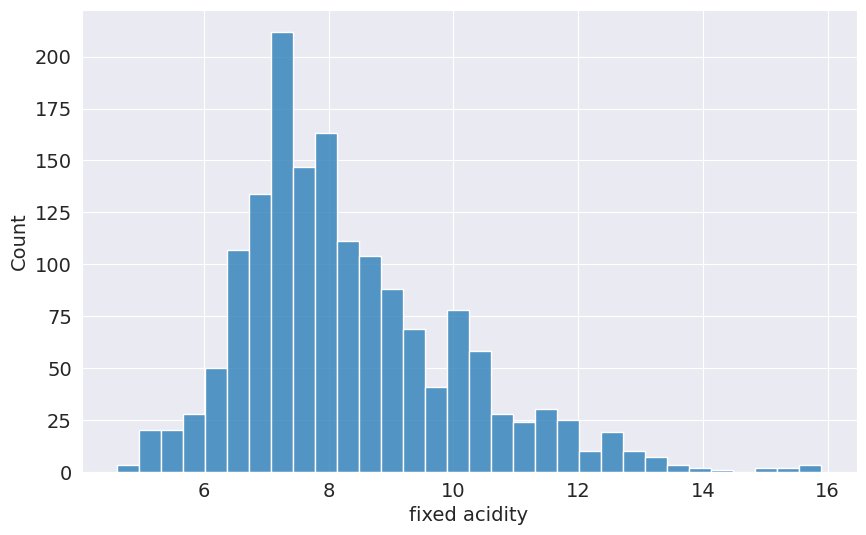

0.52 is median value for volatile acidity.


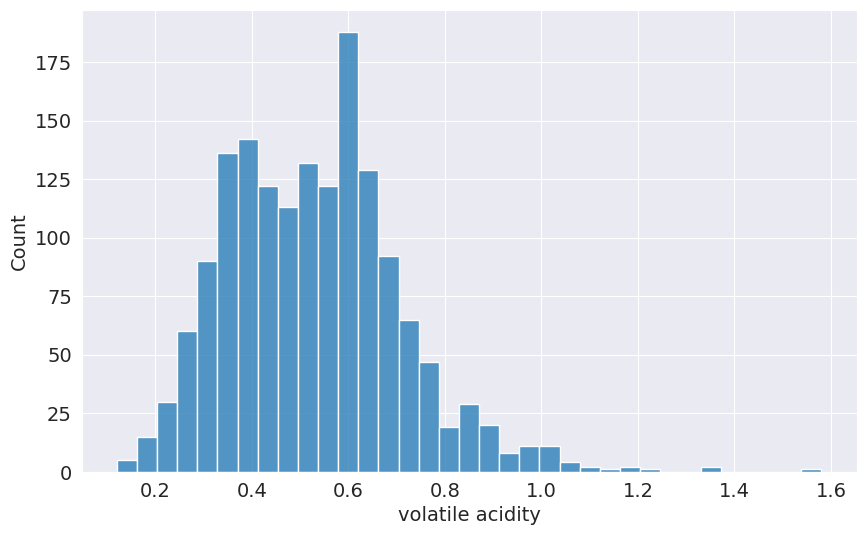

0.26 is median value for citric acid.


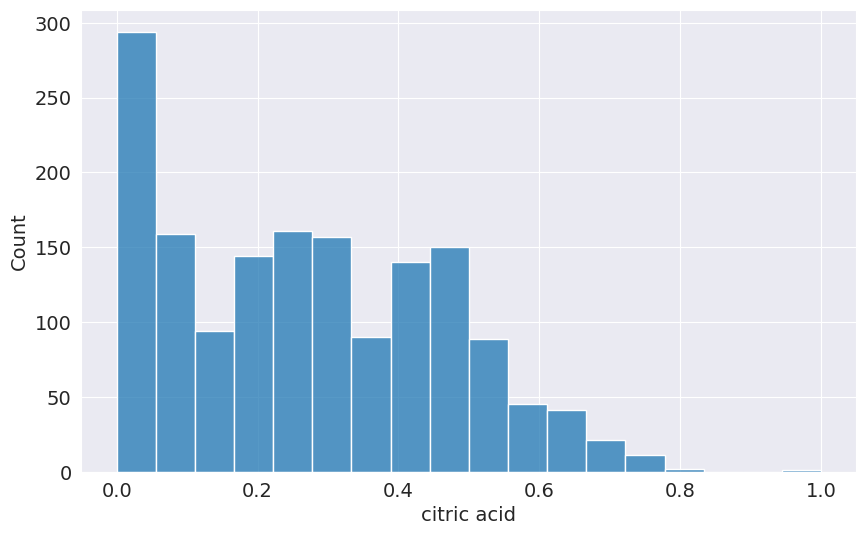

2.2 is median value for residual sugar.


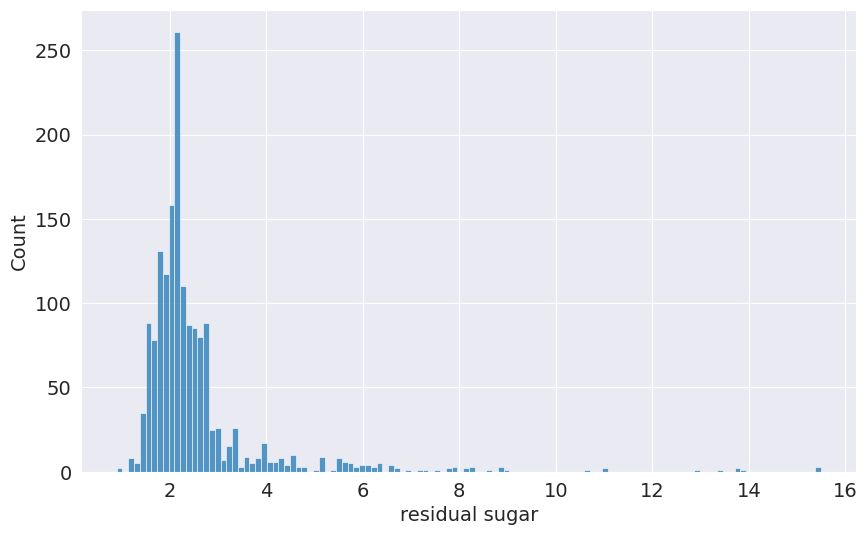

0.079 is median value for chlorides.


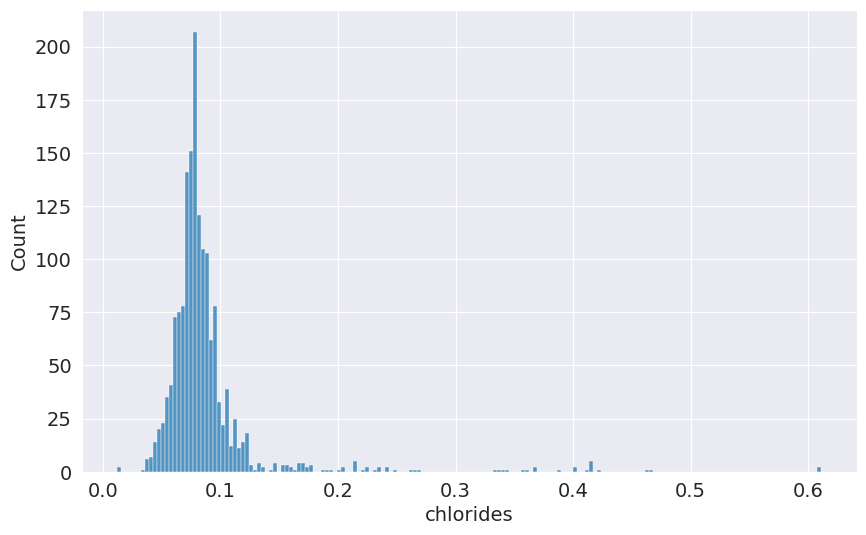

14.0 is median value for free sulfur dioxide.


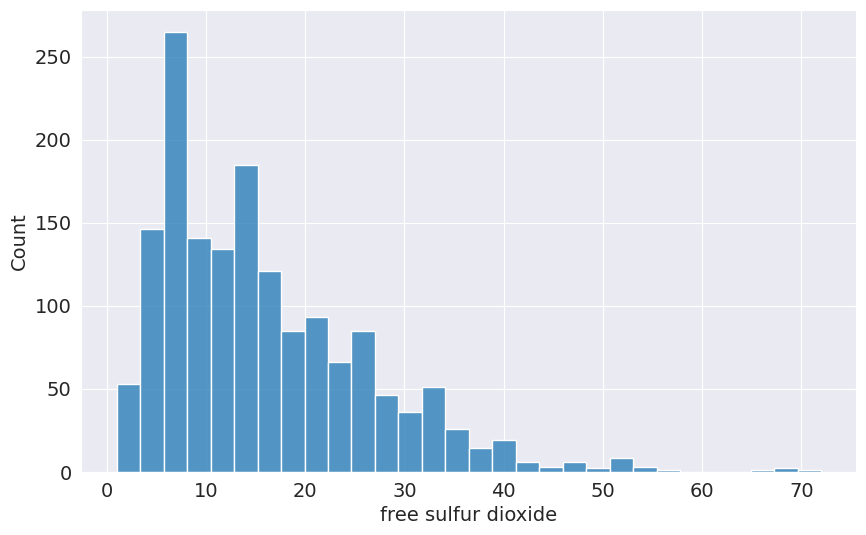

nan is median value for total sulfur dioxide.


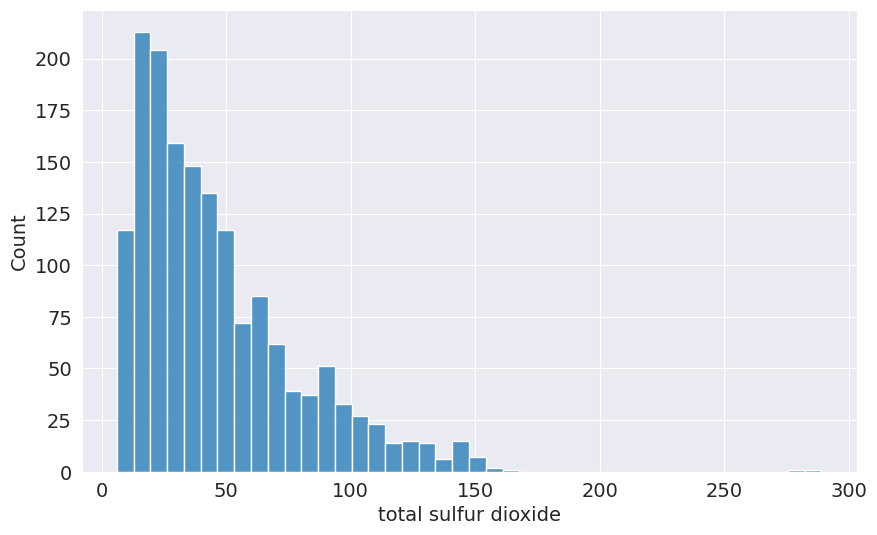

0.99675 is median value for density.


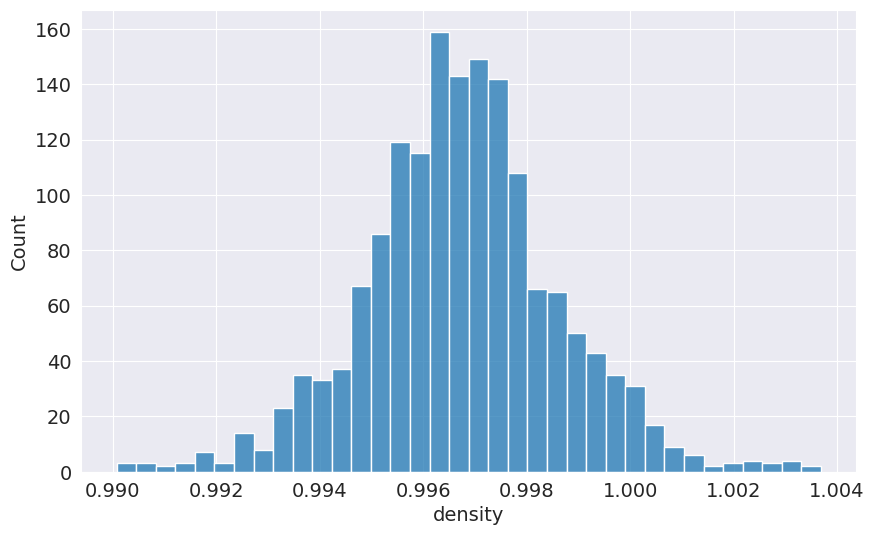

nan is median value for pH.


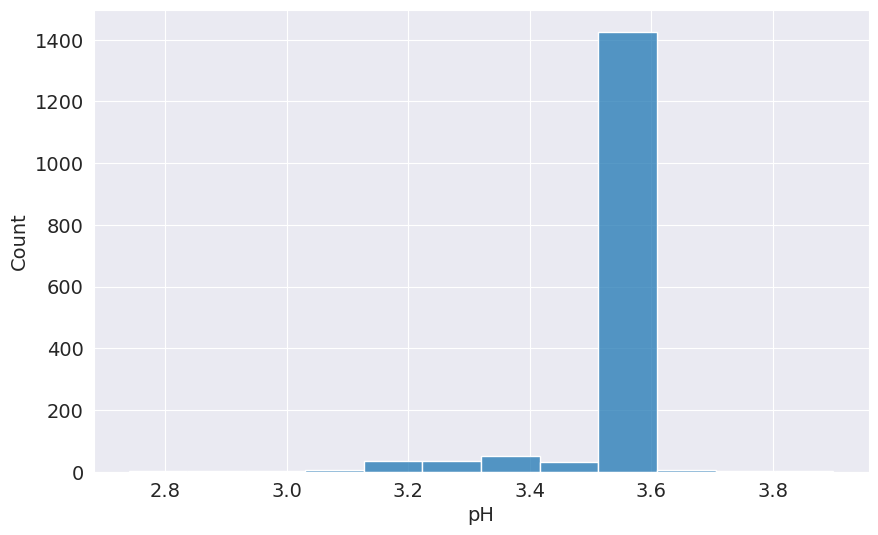

0.62 is median value for sulphates.


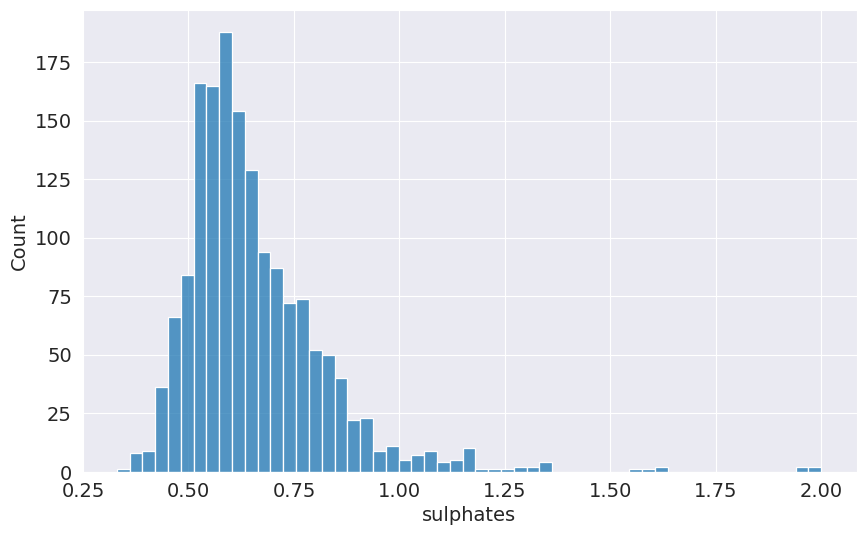

10.2 is median value for alcohol.


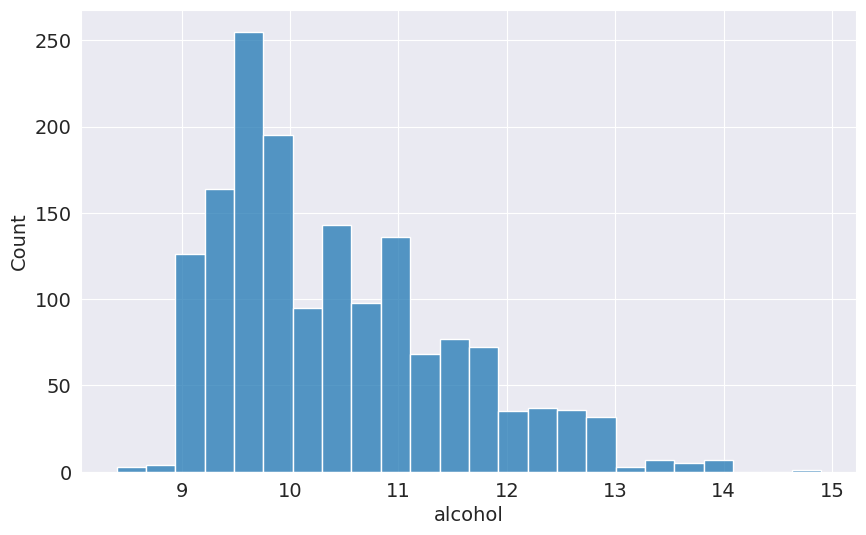

nan is median value for quality.


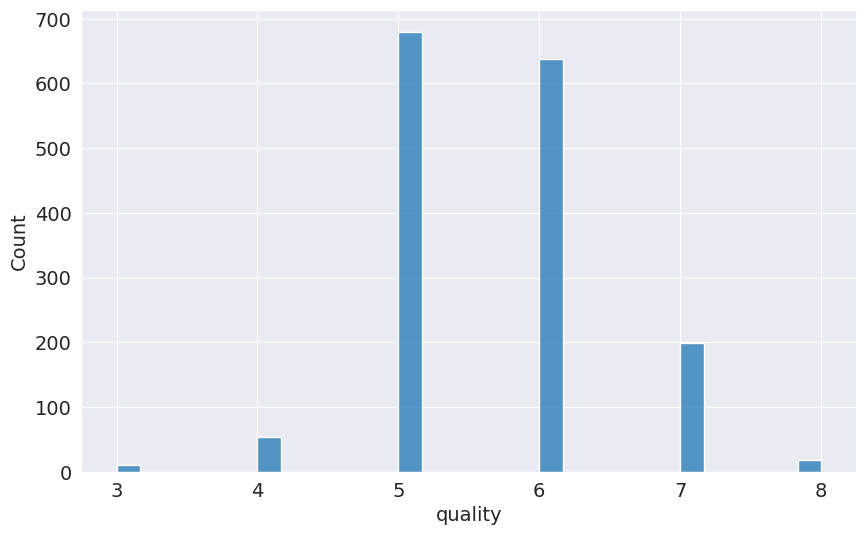

In [ ]:
create_histplot(raw_df)

# Training, Validation and Test **Sets**

In [ ]:
raw_df_copy = raw_df.copy()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(raw_df_copy, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape : ',train_df.shape)
print('val_df.shape : ',val_df.shape)
print('test_df.shape : ',test_df.shape)

train_df.shape :  (959, 12)
val_df.shape :  (320, 12)
test_df.shape :  (320, 12)


In [ ]:
input_cols = list(train_df.columns)[:-1]
target_col = 'quality'

In [ ]:
print(input_cols)

print(target_col)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
quality


In [ ]:
train_inputs = train_df[input_cols].copy()

train_targets = train_df[target_col].copy()

#val_df
val_inputs = val_df[input_cols].copy()

val_targets = val_df[target_col].copy()

#test_df
test_inputs = test_df[input_cols].copy()

test_targets = test_df[target_col].copy()

In [ ]:
train_targets.head()

1141    6.0
995     6.0
718     5.0
1406    6.0
1584    7.0
Name: quality, dtype: float64

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [ ]:
train_inputs[numeric_cols].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,958.000000,959.000000,959.000000,959.000000,959.000000
mean,8.332951,0.530542,0.274327,2.536601,0.087755,15.766423,46.310021,0.996749,3.497560,0.663952,10.440024
std,1.723041,0.180387,0.196932,1.409908,0.049376,10.271582,33.431865,0.001889,0.082986,0.178757,1.043678
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.400000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995640,3.520000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996800,3.520000,0.620000,10.200000
75%,9.200000,0.630000,0.440000,2.600000,0.090000,21.000000,62.750000,0.997800,3.520000,0.730000,11.100000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,3.850000,2.000000,14.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(raw_df_copy[numeric_cols])

MinMaxScaler()

In [ ]:
print('Minimum')
list(scaler.data_min_)

Minimum


[4.6, 0.12, 0.0, 0.9, 0.012, 1.0, 6.0, 0.99007, 2.74, 0.33, 8.4]

In [ ]:
print('Maximum')
list(scaler.data_max_)

Maximum


[15.9, 1.58, 1.0, 15.5, 0.611, 72.0, 289.0, 1.00369, 3.9, 2.0, 14.9]

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',penalty='l1',)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
train_inputs = train_inputs.dropna()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_inputs = imputer.fit_transform(train_inputs)

In [ ]:
model.fit(train_inputs[numeric_cols].tolist(), train_targets)

In [ ]:
print(model.intercept_)

In [ ]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

In [ ]:
train_targets

1141    6.0
995     6.0
718     5.0
1406    6.0
1584    7.0
       ... 
1349    5.0
1306    5.0
206     7.0
830     4.0
742     5.0
Name: quality, Length: 959, dtype: float64

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

In [ ]:
model.classes_

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')